<a href="https://colab.research.google.com/github/jonisabdulkarim/CE888/blob/main/Lab6/Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 7

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

## Data

In [2]:
countries_url = "https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv"
dictionary_url = "https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv"

df_countries = pd.read_csv(countries_url)
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
len(df_countries) # there are 167 countries

167

In [4]:
df_countries.mean()

child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64

In [5]:
df_countries.corr() # show correlation between data features

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


Strongest features:
1. Child Mortality
2. Life expectancy
3. Total fertility

## KMeans

In [6]:
X = df_countries.drop("country", axis=1)
y = df_countries["country"]

In [7]:
km_countries = cluster.KMeans(n_clusters=3)
km_countries.fit(X, y)
km_countries.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Results

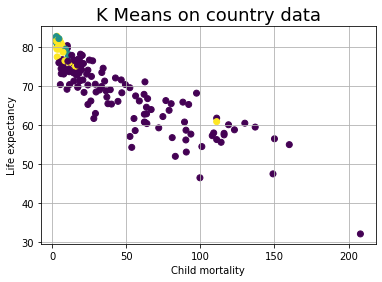

In [8]:
plt.figure()
plt.title("K Means on country data", fontsize=18)
plt.grid(True)
plt.scatter(X["child_mort"], X["life_expec"], c=km_countries.labels_)
plt.xlabel("Child mortality")
plt.ylabel("Life expectancy")
plt.show()

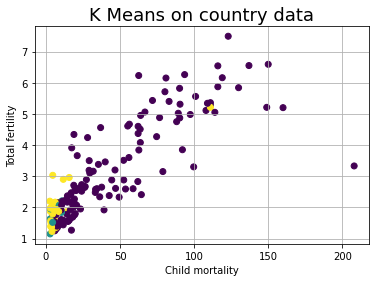

In [9]:
plt.figure()
plt.title("K Means on country data", fontsize=18)
plt.grid(True)
plt.scatter(X["child_mort"], X["total_fer"], c=km_countries.labels_)
plt.xlabel("Child mortality")
plt.ylabel("Total fertility")
plt.show()

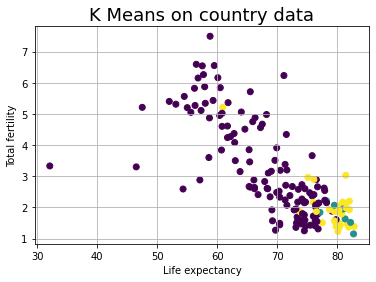

In [10]:
plt.figure()
plt.title("K Means on country data", fontsize=18)
plt.grid(True)
plt.scatter(X["life_expec"], X["total_fer"], c=km_countries.labels_)
plt.xlabel("Life expectancy")
plt.ylabel("Total fertility")
plt.show()

Yellow and green clusters are mixed. Only countries with high life expectancy ~80 years it considered developing/developed. Some notable exceptions exist.

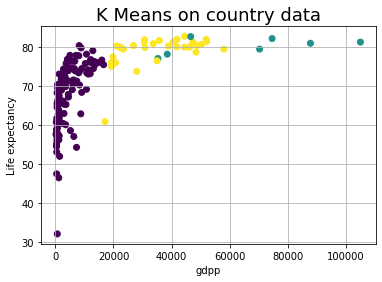

In [11]:
plt.figure()
plt.title("K Means on country data", fontsize=18)
plt.grid(True)
plt.scatter(X["gdpp"], X["life_expec"], c=km_countries.labels_)
plt.xlabel("gdpp")
plt.ylabel("Life expectancy")
plt.show()

This graph looks promising. It shows the clusters being formed mostly on the basis of GDP. Countries with low GDP are in purple, regardless of life expectancy. Green clusters have around \$20000 to \$60000 in GDP. Yellow clusters are very few. Only 7 countries are considered developed. 

In [12]:
y_pred = km_countries.predict(X)

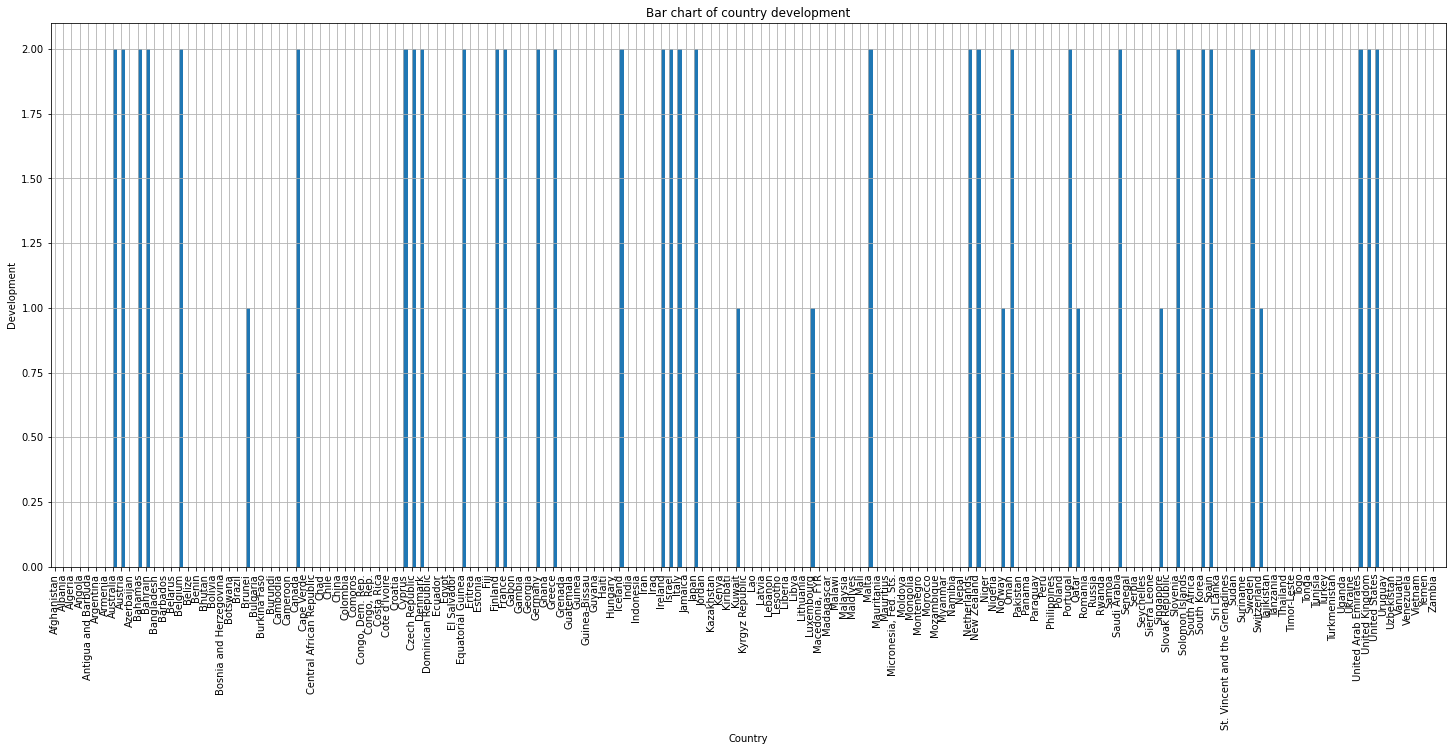

In [13]:
plt.figure(figsize=(25, 10))
plt.title("Bar chart of country development")
plt.grid(True)
#plt.scatter(y, y_pred)
plt.bar(y, y_pred, align='edge', width=0.5)
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Development")
plt.xlim(-0.5, len(y)+0.5)
plt.show()

There are only 7 developed countries. Most of them are city states. There are 32 developing countries. This seems a bit too strict. 

In [14]:
dict_countries = {name: status for name, status in zip(y, y_pred)}

In [15]:
print(dict_countries)

{'Afghanistan': 0, 'Albania': 0, 'Algeria': 0, 'Angola': 0, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 2, 'Austria': 2, 'Azerbaijan': 0, 'Bahamas': 2, 'Bahrain': 2, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 2, 'Belize': 0, 'Benin': 0, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 0, 'Brazil': 0, 'Brunei': 1, 'Bulgaria': 0, 'Burkina Faso': 0, 'Burundi': 0, 'Cambodia': 0, 'Cameroon': 0, 'Canada': 2, 'Cape Verde': 0, 'Central African Republic': 0, 'Chad': 0, 'Chile': 0, 'China': 0, 'Colombia': 0, 'Comoros': 0, 'Congo, Dem. Rep.': 0, 'Congo, Rep.': 0, 'Costa Rica': 0, "Cote d'Ivoire": 0, 'Croatia': 0, 'Cyprus': 2, 'Czech Republic': 2, 'Denmark': 2, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 2, 'Eritrea': 0, 'Estonia': 0, 'Fiji': 0, 'Finland': 2, 'France': 2, 'Gabon': 0, 'Gambia': 0, 'Georgia': 0, 'Germany': 2, 'Ghana': 0, 'Greece': 2, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 0, 'Gui

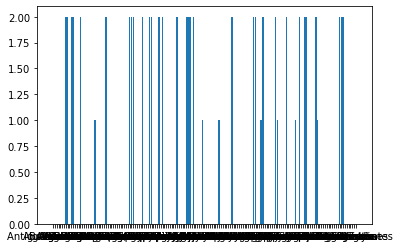

In [16]:
plt.figure()
plt.bar(range(len(dict_countries)), dict_countries.values())
labels = dict_countries.keys()
plt.xticks(range(len(dict_countries)), labels)
plt.show()

## Principal Component Analysis

In [17]:
from sklearn.model_selection import train_test_split

X, y = df_countries.drop("country", axis=1).values, km_countries.labels_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [18]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

0    128
2     32
1      7
dtype: int64
0    102
2     25
1      6
dtype: int64
0    26
2     7
1     1
dtype: int64


In [19]:
# Standardise the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.4488153 , 0.16748309, 0.13219167, 0.11071166, 0.07921934,
       0.02838192, 0.01507364, 0.01059536, 0.00752802])

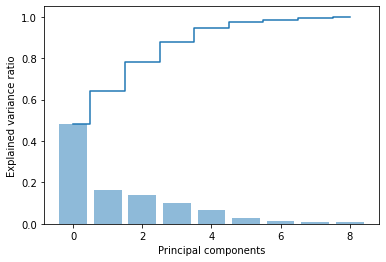

In [84]:
n = range(len(pca.explained_variance_ratio_))

import matplotlib.pyplot as plt
plt.bar(n, pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(n, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

The first component has a huge amount of influence on the decision line. The second and third are very evenly matched at just below 0.2. Using the first two PCs should return a variance ratio of over 0.6. A third principal component could be considered to increase the variance ratio to just below 0.8. 

Let's use the first two principal components.

In [23]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

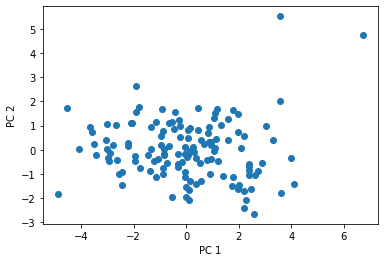

In [24]:
# plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

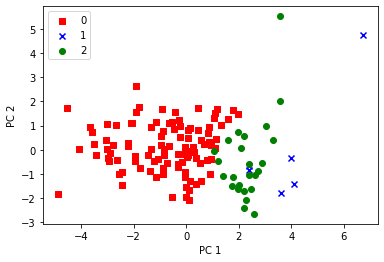

In [25]:
# plot above also using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

Accuracy on test is = 94.117647


In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


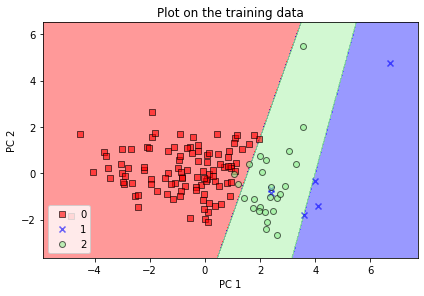

In [29]:
# Plot the decision region on training features and test labels using classifier you have trained above
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


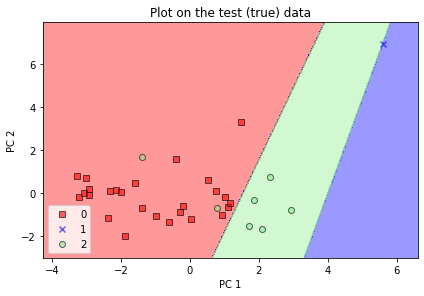

In [30]:
#  Plot the decision region on test features and true labels using classifier you have trained above
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


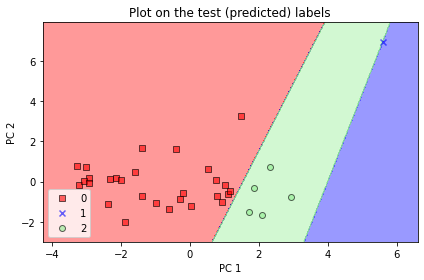

In [31]:
#  Plot the decision region on test features and predicted labels using classifier you have trained above
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi=300)
plt.show()

## Discussion

Okay, it seems like the KMeans classifier (which is used as the ground truth) might have been a *little too harsh* on what constitutes a developed country. 

I should attempt to use another more lenient clustering method.

## DBSCAN

In [115]:
dbs = cluster.DBSCAN(eps=0.5)
dbs.fit(X_train_pca)
dbs.labels_

array([ 0, -1, -1, -1,  0, -1,  0,  0,  1, -1,  0,  0,  0,  2,  0, -1, -1,
       -1,  0,  2,  0, -1,  0,  0,  0,  3,  0, -1,  0, -1,  0,  0,  0,  3,
       -1, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  3, -1,  0,
        0, -1,  0,  0,  0,  2,  0,  0,  1, -1,  0,  0,  0,  0, -1,  0,  0,
        3,  0,  0,  0, -1, -1,  3,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0, -1,  1,  0,  2,  0,  1, -1,  0, -1,  3, -1,  0,
        2, -1, -1,  0,  0, -1,  0,  0,  0,  1, -1,  0,  2,  0,  3,  1,  0,
        0, -1,  2,  3,  0, -1,  1,  0, -1,  0,  0, -1,  0, -1])

In [116]:
ser = pd.Series(dbs.labels_)

In [117]:
print(ser.value_counts()) # 89 outliers!!!
print(len(ser))

 0    71
-1    40
 3     8
 1     7
 2     7
dtype: int64
133


### Discussion

Working with DBSCAN is difficult, since it inherently looks for outliers. I can tweak around with epsilon values a lot, but it won't work well with this sort of data. Countries can be considered outliers, sure, but it is not useful to completely disregard them (i.e. Yemen is an outlier because it has a very low life expectancy due to war, but it should still be classified as a developing country).

## K-Means revisited

This time, I will use the first two PCs before applying K-Means!

In [140]:
# Standardise the data (robust scaler helps with outliers)
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
X_std = sc.fit_transform(X)

In [141]:
# Use first two PCs
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [142]:
kms = cluster.KMeans(n_clusters=3)
kms.fit(X_pca)
kms.labels_

array([2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2], dtype=int32)

In [143]:
ser = pd.Series(kms.labels_)

In [144]:
print(ser.value_counts())
print(len(ser))

1    80
2    56
0    31
dtype: int64
167


Now this looks promising. Let's plot the numbers on a graph.

In [148]:
y_pred = kms.predict(X_pca)

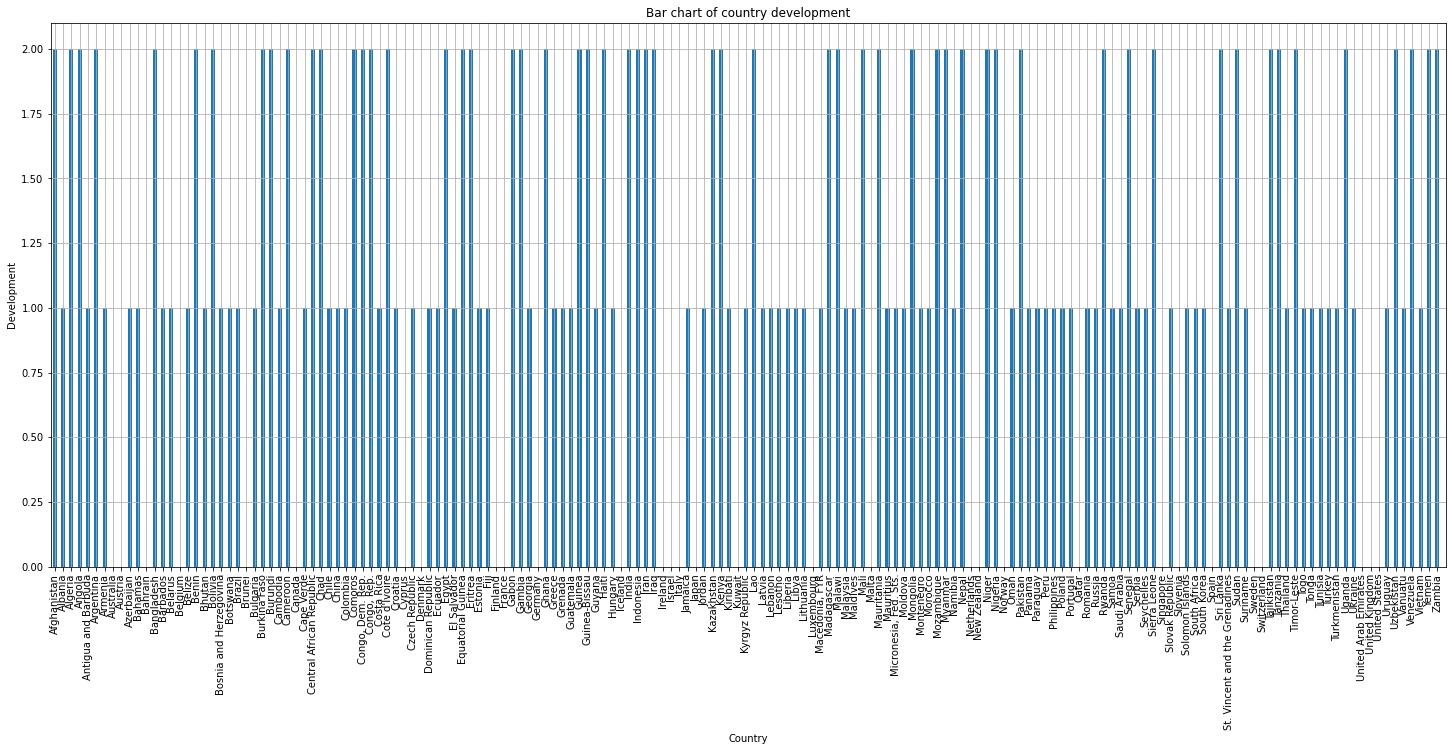

In [153]:
plt.figure(figsize=(25, 10))
plt.title("Bar chart of country development")
plt.grid(True)
plt.bar(df_countries["country"], kms.labels_, align='center', width=0.5)
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Development")
plt.xlim(-0.5, len(y))
plt.show()

This time, development is flipped. Developed countries are class 0, developing are class 1, and under-developed are class 2. The US, UK and Japan are some of the class 0 countries. Albania, Jamaica and Uruguay are class 1. Nigeria, India and Iraq are class 2. From a glance, these categories seem reasonable.

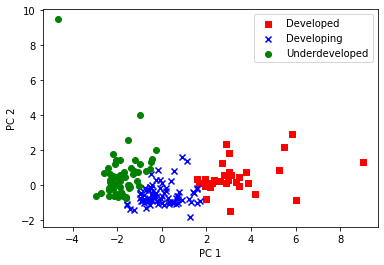

In [161]:
# Plot of two best principal components using y_pred data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
legends = ['Developed', 'Developing', 'Underdeveloped']

for l, c, m in zip(np.unique(y_pred), colors, markers):
    plt.scatter(X_pca[y_pred == l, 0], 
                X_pca[y_pred == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
plt.legend(legends)